In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import sqlite3
import scipy.stats as stats

In [44]:
# Function to simulate rolling a perfect dice 7 times and calculating the mean
def roll_dice():
    return np.mean(np.random.randint(1, 7, size=7))

# Create a SQLite database connection
connection = sqlite3.connect(':memory:')
c = connection.cursor()

# Create a table to store the trial means
c.execute("CREATE TABLE trial_means (Trial int, Mean real)")

# Generate trial means and store them in the database
for i in range(1, 1001):  # Perform 1000 trials
    mean = roll_dice()
    c.execute("INSERT INTO trial_means VALUES (?, ?)", (i, mean))
    connection.commit()
    time.sleep(0.5)  # Add a delay for animation



In [4]:
# Define the animation function
def animate(i):
    query = "SELECT * FROM trial_means WHERE Trial <= {}".format(i)
    data = pd.read_sql_query(query, connection)
    x = data['Trial']
    y = data['Mean']

    plt.clf()
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Chart 1: Histogram of the means
    axs[0, 0].hist(y, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axs[0, 0].set_xlabel('Mean')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].set_title('Distribution of Trial Means ({} trials)'.format(i))
    axs[0, 0].text(0.5, 0.9, 'Number of trials: {}'.format(i), transform=axs[0, 0].transAxes)

    # Chart 2: QQ plot
    stats.probplot(y, dist="norm", plot=axs[0, 1])
    axs[0, 1].set_title('QQ Plot')

    # Chart 3: Shapiro-Wilk test results
    w, p_value = stats.shapiro(y)
    axs[0, 2].text(0.1, 0.5, 'Shapiro-Wilk Test Results:', fontsize=12, transform=axs[0, 2].transAxes)
    axs[0, 2].text(0.1, 0.4, 'W-statistic: {:.4f}'.format(w), fontsize=10, transform=axs[0, 2].transAxes)
    axs[0, 2].text(0.1, 0.3, 'p-value: {:.4f}'.format(p_value), fontsize=10, transform=axs[0, 2].transAxes)
    axs[0, 2].axis('off')  # Remove axis

    # Chart 4: Chart for p-values from Shapiro-Wilk test
    p_values = [stats.shapiro(data['Mean'][:j])[1] for j in range(1, i+1)]
    axs[1, 0].plot(range(1, i+1), p_values)
    axs[1, 0].set_xlabel('Trials')
    axs[1, 0].set_ylabel('p-value')
    axs[1, 0].set_title('p-values from Shapiro-Wilk Test')

    # Chart 5: Original distribution
    axs[1, 1].hist(data['Mean'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axs[1, 1].set_xlabel('Mean')
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_title('Original Distribution')

    plt.tight_layout()

# Create the animation
ani = FuncAnimation(plt.gcf(), animate, interval=500)

plt.show()


<ipython-input-4-0011e29a2de2>:45: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(plt.gcf(), animate, interval=500)


<Figure size 640x480 with 0 Axes>

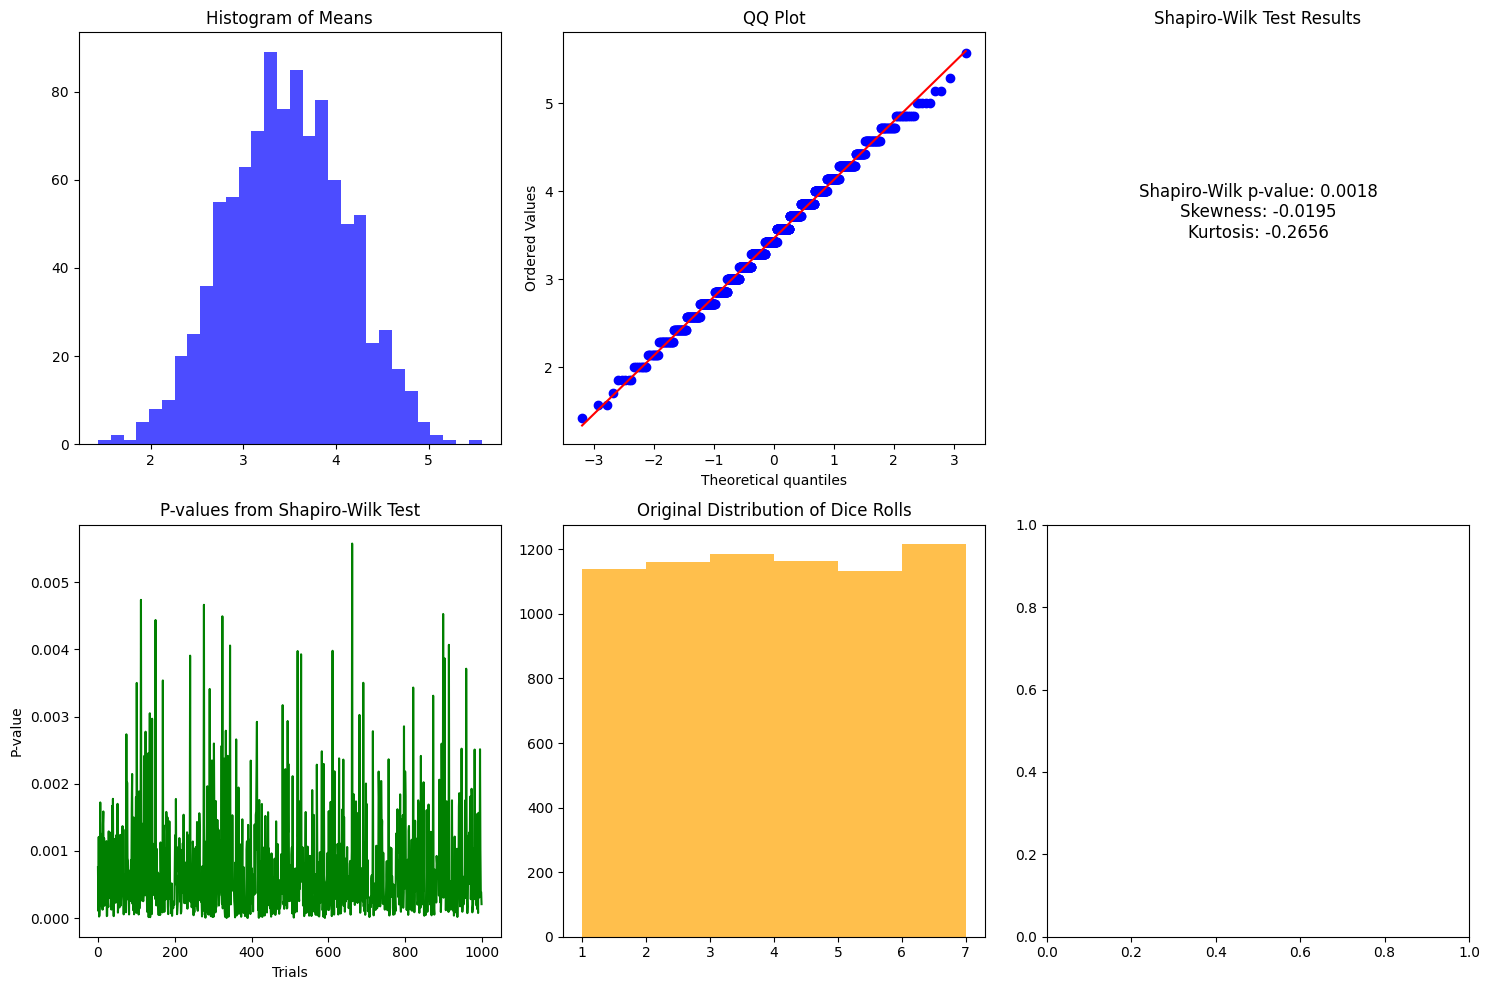

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def roll_dice(num_trials):
    return np.mean(np.random.randint(1, 7, size=(num_trials, 7)), axis=1)
num_trials = 1000
dice_means = roll_dice(num_trials)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Chart 1: Histogram of the means
axs[0, 0].hist(dice_means, bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of Means')

# Chart 2: QQ plot
stats.probplot(dice_means, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot')

# Chart 3: Shapiro-Wilk test results
shapiro_stat, shapiro_pval = stats.shapiro(dice_means)
skewness = stats.skew(dice_means)
kurtosis = stats.kurtosis(dice_means)
axs[0, 2].text(0.5, 0.5, f'Shapiro-Wilk p-value: {shapiro_pval:.4f}\nSkewness: {skewness:.4f}\nKurtosis: {kurtosis:.4f}',
               fontsize=12, ha='center')
axs[0, 2].axis('off')
axs[0, 2].set_title('Shapiro-Wilk Test Results')

# Chart 4: P-values from Shapiro-Wilk test
p_values = np.array([stats.shapiro(roll_dice(num_trials))[1] for _ in range(1000)])
axs[1, 0].plot(p_values, color='green')
axs[1, 0].set_title('P-values from Shapiro-Wilk Test')
axs[1, 0].set_xlabel('Trials')
axs[1, 0].set_ylabel('P-value')

# Chart 5: Original distribution of dice rolls
original_distribution = np.random.randint(1, 7, size=num_trials*7)
axs[1, 1].hist(original_distribution, bins=range(1, 8), color='orange', alpha=0.7)
axs[1, 1].set_title('Original Distribution of Dice Rolls')

plt.tight_layout()

plt.show()


TypeError: can only concatenate tuple (not "list") to tuple

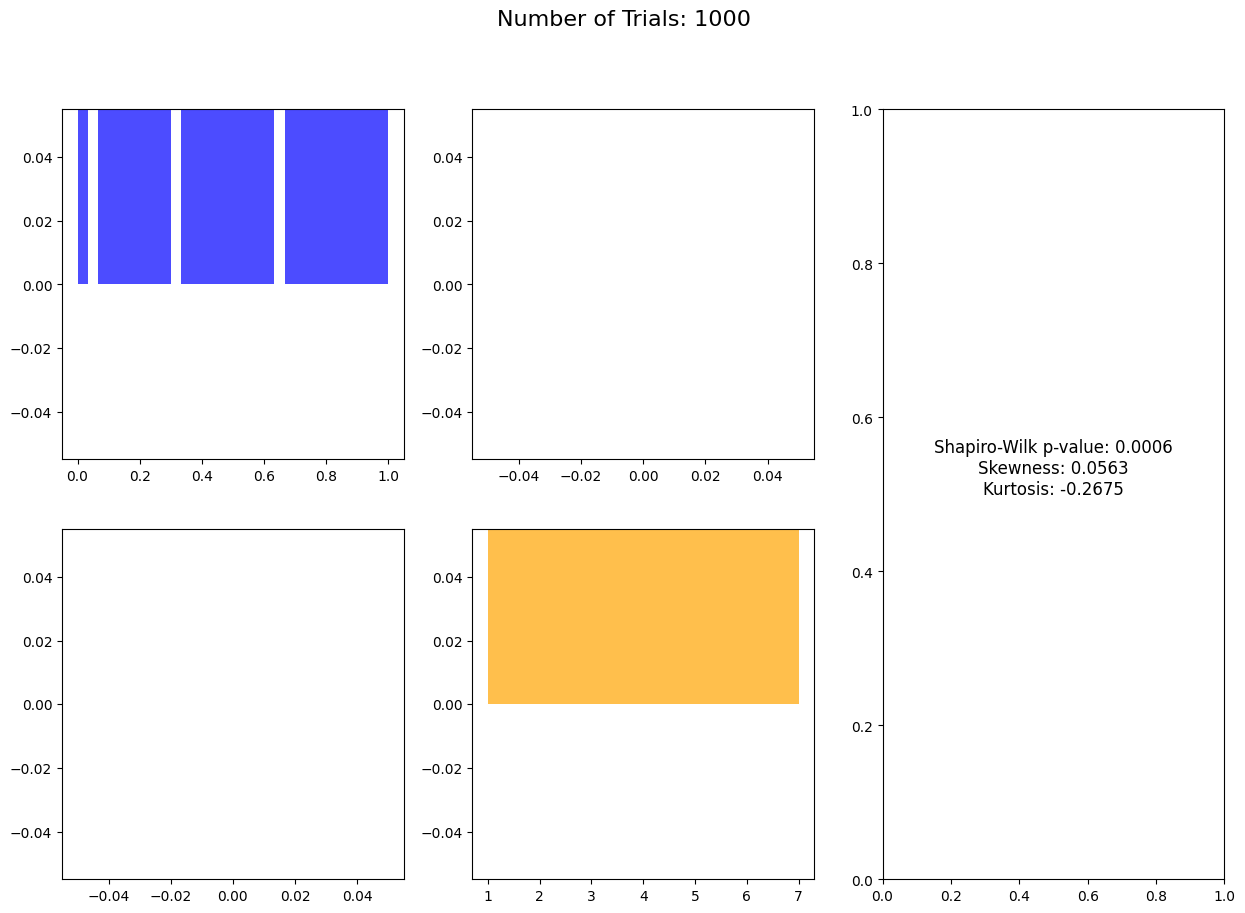

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.animation import FuncAnimation

# Function to roll the dice 'num_trials' times and calculate means
def roll_dice(num_trials):
    return np.mean(np.random.randint(1, 7, size=(num_trials, 7)), axis=1)

# Create subplots using subplot2grid
fig = plt.figure(figsize=(15, 10))

# Define subplots using subplot2grid
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)
ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=1)
ax5 = plt.subplot2grid((2, 3), (1, 1), colspan=1)

# Add title with number of trials
num_trials = 1000
fig.suptitle(f'Number of Trials: {num_trials}', fontsize=16)

# Initialize variables for animation
num_frames = 100
x_values = np.arange(num_frames)
p_values = []

# Plot initialization
hist_plot = ax1.hist([], bins=30, color='blue', alpha=0.7)[2]
qq_plot, = ax2.plot([], [], 'bo')
sw_plot = ax3.text(0.5, 0.5, '', fontsize=12, ha='center')
pval_line, = ax4.plot([], [], color='green')
dist_plot = ax5.hist([], bins=range(1, 8), color='orange', alpha=0.7)[2]

# Function to update plots
def update(frame):
    # Generate new data
    dice_means = roll_dice(num_trials)
    shapiro_stat, shapiro_pval = stats.shapiro(dice_means)
    skewness = stats.skew(dice_means)
    kurtosis = stats.kurtosis(dice_means)
    p_values.append(shapiro_pval)
    original_distribution = np.random.randint(1, 7, size=num_trials*7)

    # Update histogram
    hist, bins = np.histogram(dice_means, bins=30)
    for rect, h in zip(hist_plot, hist):
        rect.set_height(h)

    # Update QQ plot
    qq_line = stats.probplot(dice_means, dist="norm", plot=None)
    qq_plot.set_data(qq_line[0][0], qq_line[0][1])

    # Update Shapiro-Wilk test results
    sw_plot.set_text(f'Shapiro-Wilk p-value: {shapiro_pval:.4f}\nSkewness: {skewness:.4f}\nKurtosis: {kurtosis:.4f}')

    # Update p-values plot
    pval_line.set_data(x_values[:frame], p_values[:frame])

    # Update original distribution plot
    hist, bins = np.histogram(original_distribution, bins=range(1, 8))
    for rect, h in zip(dist_plot, hist):
        rect.set_height(h)

    return hist_plot + [qq_plot] + [sw_plot, pval_line] + dist_plot

# Create animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True)

# Show plots
plt.tight_layout()
plt.show()




